# Проект по восстановлению золота.

Необходимо подготовить прототип модели машинного обучения для «Цифры»: компания, которая разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В нашем распоряжении данные с параметрами добычи и очистки.

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

## 1. Подготовка данных.

Сперва откроем файлы с данными и изучем их. Файлов три:

- обучающая выборка
- тестовая выборка
- объединенный датасет

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

df_full  = pd.read_csv('gold_recovery_full.csv')
df_train = pd.read_csv('gold_recovery_train.csv')
df_test  = pd.read_csv('gold_recovery_test.csv')

df_full.info()
df_full.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [49]:
#Подсчет количества пропусков в каждом столбцу
null_counts = df_full.isnull().sum()
#Пропуски в каждом столбце в процентах
null_pct = null_counts / df_full.shape[0] * 100

#Объединим все в один датафрейм
null_df = pd.DataFrame({'Количество пропусков':null_counts,'В процентах':null_pct})
null_df = null_df.sort_values(by='Количество пропусков', ascending=False).head(15)
null_df = null_df.T.astype(int)
null_df

,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_au,rougher.output.tail_sol,rougher.input.floatbank11_xanthate,secondary_cleaner.output.tail_sol,final.output.recovery,rougher.calculation.au_pb_ratio,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,rougher.input.floatbank10_sulfate,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_sol,rougher.input.floatbank11_sulfate,rougher.state.floatbank10_e_air
Количество пропусков,3119,2737,2736,2736,2257,2215,1963,1627,1609,1546,1301,1151,798,678,620
В процентах,13,12,12,12,9,9,8,7,7,6,5,5,3,2,2


In [50]:
df_train.info()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [51]:
#Подсчет количества пропусков в каждом столбцу
null_counts = df_train.isnull().sum()
#Пропуски в каждом столбце в процентах
null_pct = null_counts / df_train.shape[0] * 100

#Объединим все в один датафрейм
null_df = pd.DataFrame({'Количество пропусков':null_counts,'В процентах':null_pct})
null_df = null_df.sort_values(by='Количество пропусков', ascending=False).head(15)
null_df = null_df.T.astype(int)
null_df

,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_sol,rougher.output.tail_au,secondary_cleaner.output.tail_sol,rougher.input.floatbank11_xanthate,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,rougher.calculation.au_pb_ratio,rougher.input.floatbank10_sulfate,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_sol,rougher.input.floatbank11_sulfate,rougher.state.floatbank10_e_air
Количество пропусков,2573,2250,2249,2249,1986,1904,1521,1307,1262,1242,1044,985,636,623,603
В процентах,15,13,13,13,11,11,9,7,7,7,6,5,3,3,3


In [52]:
df_test.info()
df_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [53]:
#Подсчет количества пропусков в каждом столбцу
null_counts = df_test.isnull().sum()
#Пропуски в каждом столбце в процентах
null_pct = null_counts / df_test.shape[0] * 100

#Объединим все в один датафрейм
null_df = pd.DataFrame({'Количество пропусков':null_counts,'В процентах':null_pct})
null_df = null_df.sort_values(by='Количество пропусков', ascending=False).head(15)
null_df = null_df.T.astype(int)
null_df

,rougher.input.floatbank11_xanthate,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,rougher.input.floatbank10_sulfate,primary_cleaner.input.xanthate,rougher.input.floatbank10_xanthate,rougher.input.feed_sol,rougher.input.floatbank11_sulfate,rougher.input.feed_rate,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank2_b_air,rougher.input.feed_size,secondary_cleaner.state.floatbank2_a_air,rougher.state.floatbank10_a_air,rougher.state.floatbank10_c_air
Количество пропусков,353,302,284,257,166,123,67,55,40,34,23,22,20,17,17
В процентах,6,5,4,4,2,2,1,0,0,0,0,0,0,0,0


Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery. Найдите MAE между расчётами и значением признака.

$ Recovery = \frac{C\times(F-T)}{F\times(C-T)} \times 100\% $ - эффективность обогащения.

- С - доля золота в концентрате после флотации/очистки;
- F - доля золота в сырье/концентрате до флотации/очистки;
- T - доля золота в отвальных хвостах после флотации/очистки.

In [54]:
df_train['Recovery'] = ( df_train['rougher.output.concentrate_au'] * \
                        (df_train['rougher.input.feed_au'] - df_train['rougher.output.tail_au']) ) \
/ ( df_train['rougher.input.feed_au'] * (df_train['rougher.output.concentrate_au'] - df_train['rougher.output.tail_au']) ) * 100

Перед тем как вычислять MAE нужно избавиться от пропусков в столбцах 'Recovery' и 'rougher.output.recovery'.

In [55]:
df_train_cleaned = df_train.dropna(subset=['Recovery','rougher.output.recovery'])
mean_absolute_error(df_train_cleaned['rougher.output.recovery'],df_train_cleaned['Recovery'])

9.444891926100695e-15

В результате получаем, что эффективность обогащения рассчитана правильно.

Теперь проанализируем признаки недоступные в тестовой выборке.

In [56]:
train_features = df_train.columns.to_list()
test_features = df_test.columns.to_list()
missing_features = np.setdiff1d(train_features,test_features)
df_train[missing_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 35 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Recovery                                            14577 non-null  float64
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_au                         16789 non-null  float64
 3   final.output.concentrate_pb                         16788 non-null  float64
 4   final.output.concentrate_sol                        16490 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_au                                16794 non-null  float64
 8   final.output.tail_pb                                16677 non-null  float64


В тестовой выборке отсутствует целевой признак, значения по отвальным хвостам на каждом этапе технологического процесса (флотация, первичная очистка, вторичная очистка, финал). Отсутствуют значения концентрации Ag, Au, Pb, Sol в конечном продукте, на выходе из флотации и из первичной очистки. Также отсутствуют какие-то вычисленные значения на этапе флотации.

Также следует отметить, что все пропущенные признаки - количественного типа.

Теперь проведем предобработку данных.

In [57]:
#Избавимся от пропусков
df_full.fillna(method='ffill',inplace=True)
df_train.fillna(method='ffill',inplace=True)
df_test.fillna(method='ffill',inplace=True)
#Проверка
print('Пропусков в полном датасете   = ' + str(df_full.isnull().sum().sum()))
print('Пропусков в обучающей выборке = ' + str(df_train.isnull().sum().sum()))
print('Пропусков в тестовой выборке  = ' + str(df_test.isnull().sum().sum()))

#Преобразуем столбец date
df_full['date']  = pd.to_datetime(df_full['date'], format='%Y-%m-%d %H:%M:%S')
df_train['date'] = pd.to_datetime(df_train['date'], format='%Y-%m-%d %H:%M:%S')
df_test['date']  = pd.to_datetime(df_test['date'], format='%Y-%m-%d %H:%M:%S')

#Восстановим признаки в тестовой выборке
need_to_stay = ['final.output.recovery', 'rougher.output.recovery', 'final.output.concentrate_ag','final.output.concentrate_au','final.output.concentrate_pb','final.output.concentrate_sol','rougher.output.concentrate_ag','rougher.output.concentrate_au','rougher.output.concentrate_pb','rougher.output.concentrate_sol']
targets = df_full.loc[df_full['date'].isin(df_test['date'].to_list()),need_to_stay].reset_index()
for i in range(len(need_to_stay)):
    df_test[need_to_stay[i]] = targets[need_to_stay[i]]
#Избавимся от признаков в обучающей выборке, которых нет в тестовой
missing_features = missing_features[~pd.Series(missing_features).isin(need_to_stay)]
df_train.drop(missing_features,axis=1,inplace=True)
#Проверка
print(df_train.shape[1])
print(df_test.shape[1])

Пропусков в полном датасете   = 0
Пропусков в обучающей выборке = 0
Пропусков в тестовой выборке  = 0
63
63


В предобработке данных мы извлекли из исходного датасета значения двух целевых признаков (эффективность обогащения чернового концентрата и эффективность обогащения финального концентрата) и некоторые признаки, которые нам понадобятся для исследования суммарной концентрации всех веществ на различных этапах. После, мы избвились от признаков в обучающей выборке, которых нет в тестовой, использовав ранее созданный массив missing_targets, не забыв убрать из него целевые признаки и те, которые будем использовать в дальнейших расчетах. Также мы заполнили все пропуски методом forward fill и преобразовали столбец date.

## Проанализируем данные.

 Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.

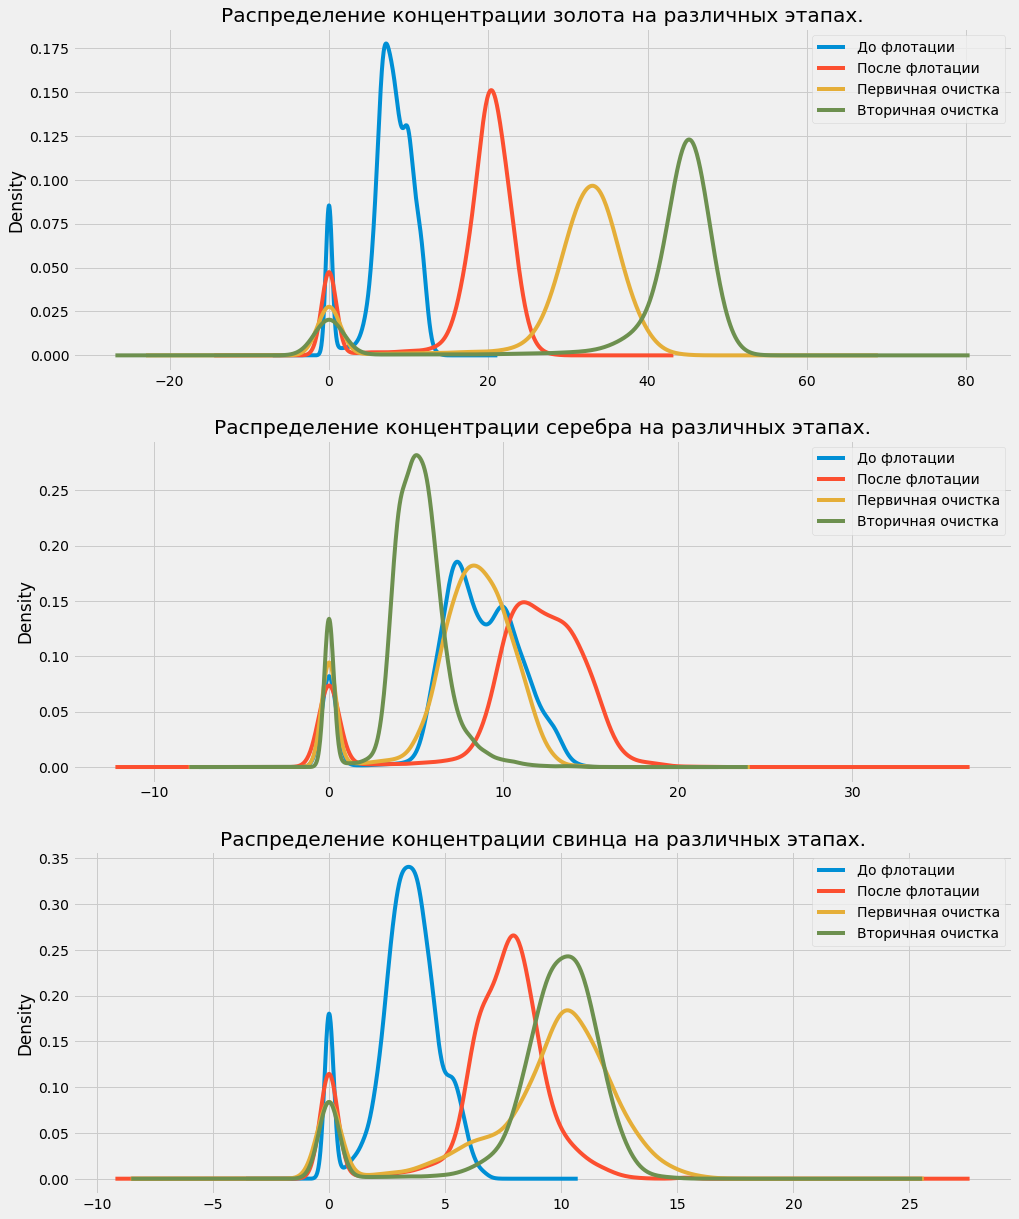

In [58]:
plt.style.use('fivethirtyeight')

elements = ['au','ag','pb']
elem_full_name = ['золота', 'серебра', 'свинца']

plt.rcParams['figure.figsize'] = (15,20)

for i in range(3):
    plt.subplot(3,1,i+1)
    df_full['rougher.input.feed_' + elements[i]].plot.kde(label='До флотации', legend=True)
    df_full['rougher.output.concentrate_' + elements[i]].plot.kde(label='После флотации', legend=True)
    df_full['primary_cleaner.output.concentrate_' + elements[i]].plot.kde(label='Первичная очистка', legend=True)
    df_full['final.output.concentrate_' + elements[i]].plot.kde(label='Вторичная очистка', legend=True)
    plt.title('Распределение концентрации ' + elem_full_name[i] + ' на различных этапах.')
    
plt.show()

Концентрация золота после каждого этапа технологического процесса увеличивается и нулевые значения уменьшаются.

По мере проведения технологического процесса получения золота из руды видим как сначала после проведения флотации концентрация серебра увеличилась, а затем постепенно после каждого этапа очистки уменьшается. Нулевые значение следуют такому же тренду.

Поведение концентрации свинца по началу схоже с золотом (увеличение концентрации по мере проведения процесса), однако, после первичной очистки рост останавливается.

Теперь сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

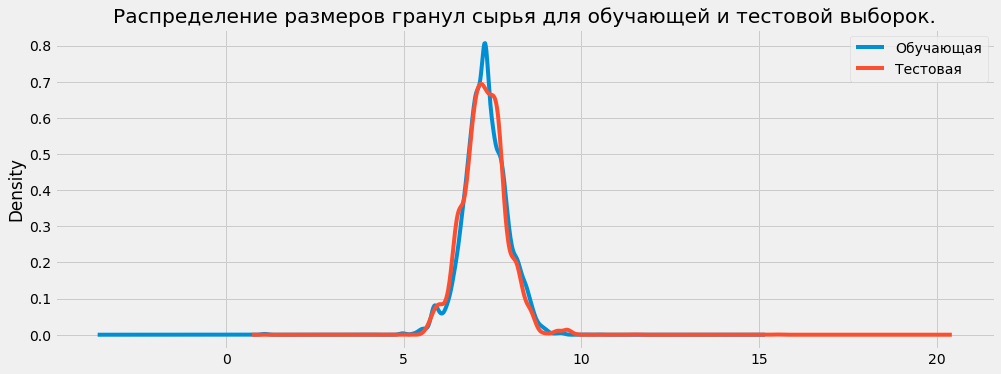

In [59]:
df_train['primary_cleaner.input.feed_size'].plot.kde(label='Обучающая', legend=True,figsize=(15,5.5))
df_test['primary_cleaner.input.feed_size'].plot.kde(label='Тестовая', legend=True)
plt.title('Распределение размеров гранул сырья для обучающей и тестовой выборок.')

plt.show()

Распределения особо не различаются, следовательно, оценка модели будет правильной.

Далее исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

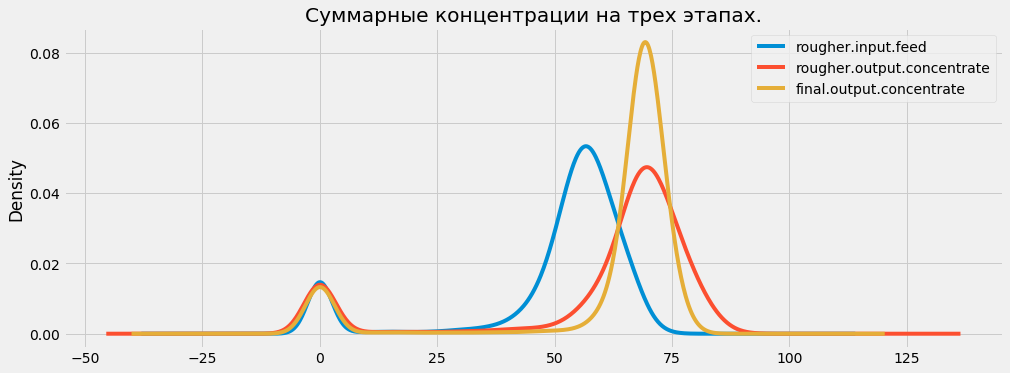

In [60]:
#Рассчитаем суммарную концентрацию на всех этапах
df_train['rougher.input.feed'] = df_train['rougher.input.feed_au'] + df_train['rougher.input.feed_ag'] \
                                                        + df_train['rougher.input.feed_pb'] + df_train['rougher.input.feed_sol']
df_train['rougher.output.concentrate'] = df_train['rougher.output.concentrate_au'] + df_train['rougher.output.concentrate_ag'] \
                                        + df_train['rougher.output.concentrate_pb'] + df_train['rougher.output.concentrate_sol']
df_train['final.output.concentrate'] = df_train['final.output.concentrate_au'] + df_train['final.output.concentrate_ag'] \
                                            + df_train['final.output.concentrate_pb'] + df_train['final.output.concentrate_sol']

df_train['rougher.input.feed'].plot.kde(label='rougher.input.feed',legend=True,figsize=(15,5.5))
df_train['rougher.output.concentrate'].plot.kde(label='rougher.output.concentrate',legend=True)
df_train['final.output.concentrate'].plot.kde(label='final.output.concentrate',legend=True)

plt.title('Суммарные концентрации на трех этапах.')

plt.show()

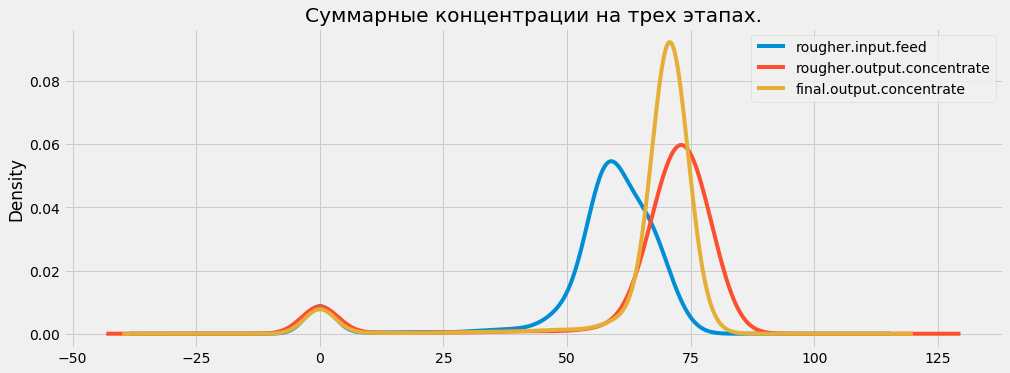

In [61]:
df_test['rougher.input.feed'] = df_test['rougher.input.feed_au'] + df_test['rougher.input.feed_ag'] \
                                                        + df_test['rougher.input.feed_pb'] + df_test['rougher.input.feed_sol']
df_test['rougher.output.concentrate'] = df_test['rougher.output.concentrate_au'] + df_test['rougher.output.concentrate_ag'] \
                                        + df_test['rougher.output.concentrate_pb'] + df_test['rougher.output.concentrate_sol']
df_test['final.output.concentrate'] = df_test['final.output.concentrate_au'] + df_test['final.output.concentrate_ag'] \
                                            + df_test['final.output.concentrate_pb'] + df_test['final.output.concentrate_sol']

df_test['rougher.input.feed'].plot.kde(label='rougher.input.feed',legend=True,figsize=(15,5.5))
df_test['rougher.output.concentrate'].plot.kde(label='rougher.output.concentrate',legend=True)
df_test['final.output.concentrate'].plot.kde(label='final.output.concentrate',legend=True)

plt.title('Суммарные концентрации на трех этапах.')

plt.show()

Очень много нулевых значений на каждом этапе. Они нам не нужны, так как будут затруднять обучение модели, следовательно, избавимся от них.

In [62]:
#Для обучающей выборки
df_train.drop(df_train[df_train['rougher.input.feed'] < 5].index, inplace=True)
df_train.drop(df_train[df_train['rougher.output.concentrate'] < 5].index, inplace=True)
df_train.drop(df_train[df_train['final.output.concentrate'] < 5].index, inplace=True)

#Для тестовой выборки
df_test.drop(df_test[df_test['rougher.input.feed'] < 5].index, inplace=True)
df_test.drop(df_test[df_test['rougher.output.concentrate'] < 5].index, inplace=True)
df_test.drop(df_test[df_test['final.output.concentrate'] < 5].index, inplace=True)

Теперь проверим распределения.

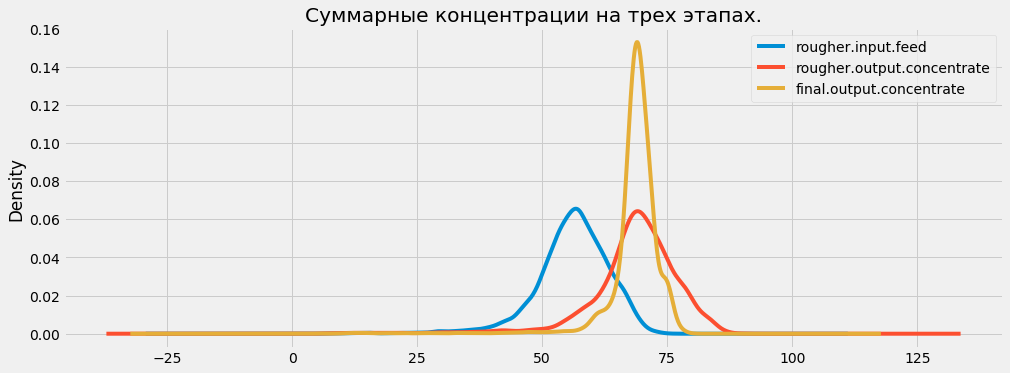

In [63]:
df_train['rougher.input.feed'].plot.kde(label='rougher.input.feed',legend=True,figsize=(15,5.5))
df_train['rougher.output.concentrate'].plot.kde(label='rougher.output.concentrate',legend=True)
df_train['final.output.concentrate'].plot.kde(label='final.output.concentrate',legend=True)

plt.title('Суммарные концентрации на трех этапах.')

plt.show()

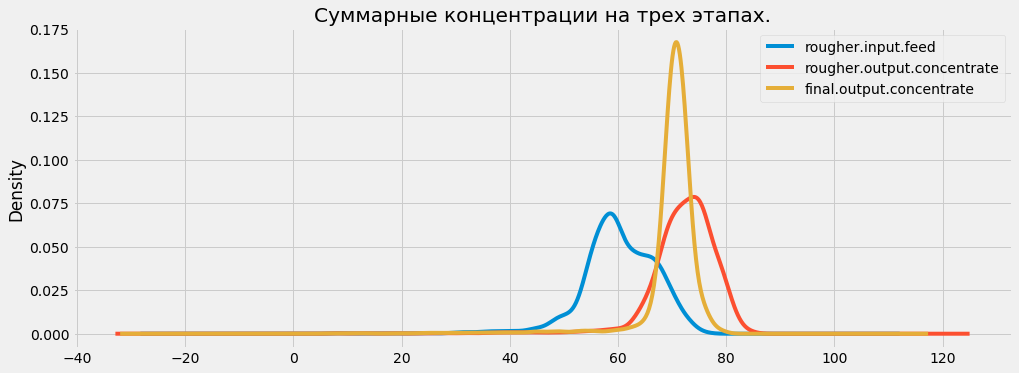

In [64]:
df_test['rougher.input.feed'].plot.kde(label='rougher.input.feed',legend=True,figsize=(15,5.5))
df_test['rougher.output.concentrate'].plot.kde(label='rougher.output.concentrate',legend=True)
df_test['final.output.concentrate'].plot.kde(label='final.output.concentrate',legend=True)

plt.title('Суммарные концентрации на трех этапах.')

plt.show()

Аномалии удалены. Избавимся от ранее добавленных признаков, которые использовали для расчетов суммарных концентраций и от столбца date.

In [65]:
need_to_stay.remove('final.output.recovery')
need_to_stay.remove('rougher.output.recovery')
need_to_stay.append('rougher.input.feed')
need_to_stay.append('rougher.output.concentrate')
need_to_stay.append('final.output.concentrate')
need_to_stay.append('date')

df_train.drop(need_to_stay,axis=1,inplace=True)
df_test.drop(need_to_stay,axis=1,inplace=True)

(14584, 54)
(5282, 54)


На данном этапе мы проследили как меняется концентрация трех металлов (Au,Ag,Pb) на различных этапах технологического процесса. Концентрация золота на каждом этапе увеличивается; концентрация серебра после флотации увеличивается, а затем на этапах очистки уменьшается; концентрация свинца увеличивается вплоть до второго этапа очистки, а затем остается примерно той же.

Также мы сравнили распределение размеров гранул сырья в обучающей и тестовой выборках, и узнали, что они идентичны.

Также исследовали суммарную концентрацию всех веществ на каждом этапе процесса и выявили аномалии (нулевые значения), от которых избавились. Также убрали столбцы, которые использовали для расчета этих суммарных концентраций (как и сами результаты), которых изначально не было в тестовой выборке.

## Постройте модель.

 Напишите функцию для вычисления sMAPE.

In [66]:
def sMAPE(y_true, y_pred):
    N = len(y_true)
    return (1 / N) * sum( abs(y_true - y_pred) / ( (abs(y_true) + abs(y_pred)) / 2 ) ) * 100

In [67]:
#Протестируем функцию на константной модели
pred1 = pd.Series(df_test['rougher.output.recovery'].median(), index=df_test.index)
s1 = sMAPE(df_test['rougher.output.recovery'],pred1)
pred2 = pd.Series(df_test['final.output.recovery'].median(),index=df_test.index)
s2 = sMAPE(df_test['final.output.recovery'],pred2)

final_sMAPE = .25 * s1 + .75 * s2
print('Итоговое sMAPE для константной модели = ' + str(final_sMAPE))

Итоговое sMAPE для константной модели = 7.15135042874507


Функция вроде работает.

Опробуем линейную регрессию.

In [69]:
target_rougher   = df_train['rougher.output.recovery']
target_final     = df_train['final.output.recovery']
features_rougher = df_train.drop(['rougher.output.recovery','final.output.recovery'],axis=1)
features_final   = df_train.drop(['rougher.output.recovery','final.output.recovery'],axis=1)

scaler           = StandardScaler()
scaler.fit(features_rougher)
features_rougher = scaler.transform(features_rougher)
features_final   = scaler.transform(features_final)

smape_scorer     = make_scorer(sMAPE, greater_is_better=False)

model_rougher    = LinearRegression()
cross_rougher    = cross_val_score(model_rougher,features_rougher,target_rougher,scoring=smape_scorer,cv=10) 
final_score_r    = cross_rougher.mean()

model_final      = LinearRegression()
cross_final      = cross_val_score(model_final,features_final,target_final,scoring=smape_scorer,cv=10) 
final_score_f    = cross_final.mean()

final_sMAPE = abs(.25 * final_score_r + .75 * final_score_f)
print('Итоговое sMAPE для линейной регрессии = ' + str(final_sMAPE))

Итоговое sMAPE для линейной регрессии = 10.420680188669332


По умолчанию model.score для задач регрессии - это коэффициент детерминации. Поскольку нам нужно использовать нашу функцию, то через make_scorer закинем ее в кросс-валидацию. Результат у линейной регрессии получился хуже, чем у константной модели, следовательно отбросим ее.

Теперь попробуем случайный лес. Подберем ему гиперпараметр max_depth.

In [70]:
for m_d in range(2,10,2):
    model_rougher    = RandomForestRegressor(random_state=12345,max_depth=m_d,n_estimators=3)
    cross_rougher    = cross_val_score(model_rougher,features_rougher,target_rougher,scoring=smape_scorer,cv=10) 
    final_score_r    = abs(cross_rougher.mean())
    print('max_depth = ' + str(m_d) + ', sMAPE = ' + str(final_score_r))

max_depth = 2, sMAPE = 8.45098982639135
max_depth = 4, sMAPE = 7.869284165629115
max_depth = 6, sMAPE = 7.835089060449951
max_depth = 8, sMAPE = 9.3516206470146


Наименьший результат по модулю при максимальной глубине дерева равной 5. Теперь увеличим еще один гиперпараметр - количество оценщиков.

In [71]:
model_rougher    = RandomForestRegressor(random_state=12345,max_depth=4,n_estimators=60)
cross_rougher    = cross_val_score(model_rougher,features_rougher,target_rougher,scoring=smape_scorer,cv=10) 
final_score_r    = abs(cross_rougher.mean())
print('sMAPE у флотации = ' + str(final_score_r))

sMAPE у флотации = 7.7071315242466225


Для флотации остановимся на случайном лесе с максимальной глубиной 3 и количеством оценщиков 100.

Теперь подберем случайный лес для финальной стадии.

In [72]:
for m_d in range(2,10,2):
    model_final      = RandomForestRegressor(random_state=12345,max_depth=m_d,n_estimators=3)
    cross_final      = cross_val_score(model_final,features_final,target_final,scoring=smape_scorer,cv=10) 
    final_score_f    = abs(cross_final.mean())
    print('max_depth = ' + str(m_d) + ', sMAPE = ' + str(final_score_f))

max_depth = 2, sMAPE = 9.929192698717795
max_depth = 4, sMAPE = 9.819349362174616
max_depth = 6, sMAPE = 9.862700335823535
max_depth = 8, sMAPE = 10.454339579626708


Для финальной стадии случайный лес будет с глубиной равной 5. Увеличим количество оценщиков.

In [73]:
model_final      = RandomForestRegressor(random_state=12345,max_depth=4,n_estimators=60)
cross_final      = cross_val_score(model_final,features_final,target_final,scoring=smape_scorer,cv=10) 
final_score_f    = abs(cross_final.mean())
print('sMAPE у финала = ' + str(final_score_f))

sMAPE у финала = 9.588696137956688


In [74]:
.25 * final_score_r + .75 * final_score_f

9.118304984529171

Количество оценщиков особо не влияет на качество модели.

Модели подобрали. Теперь проверим их на тестовой выборке.

In [76]:
target_rougher_test   = df_test['rougher.output.recovery']
target_final_test     = df_test['final.output.recovery']
features_rougher_test = df_test.drop(['rougher.output.recovery','final.output.recovery'],axis=1)
features_final_test   = df_test.drop(['rougher.output.recovery','final.output.recovery'],axis=1)

scaler                = StandardScaler()
scaler.fit(features_rougher_test)
features_rougher_test = scaler.transform(features_rougher_test)
features_final_test   = scaler.transform(features_final_test)

model_rougher    = RandomForestRegressor(random_state=12345,max_depth=4,n_estimators=60)
cross_rougher    = cross_val_score(model_rougher,features_rougher_test,target_rougher_test,scoring=smape_scorer,cv=10)
sMAPE_rougher    = cross_rougher.mean()

model_final      = RandomForestRegressor(random_state=12345,max_depth=4,n_estimators=60)
cross_final      = cross_val_score(model_final,features_final_test,target_final_test,scoring=smape_scorer,cv=10) 
sMAPE_final      = cross_final.mean()

final_sMAPE      = abs( .25 * sMAPE_rougher + .75 * sMAPE_final )
print('Финальная sMAPE на тестовой выборке = ' + str(final_sMAPE))

7.105594281443386


Интересно, действительно ли подобранные модели дают наилучший результат на тестовой выборке?

In [78]:
model_rougher    = RandomForestRegressor(random_state=12345,max_depth=2,n_estimators=40)
cross_rougher    = cross_val_score(model_rougher,features_rougher_test,target_rougher_test,scoring=smape_scorer,cv=10)
sMAPE_rougher    = cross_rougher.mean()

model_final      = RandomForestRegressor(random_state=12345,max_depth=2,n_estimators=40)
cross_final      = cross_val_score(model_final,features_final_test,target_final_test,scoring=smape_scorer,cv=10) 
sMAPE_final      = cross_final.mean()

final_sMAPE      = abs( .25 * sMAPE_rougher + .75 * sMAPE_final )
print('Финальная sMAPE на тестовой выборке = ' + str(final_sMAPE))

Финальная sMAPE на тестовой выборке = 6.862248617574929


Кажется нет...

## Выводы

В результате проделанной работы мы восстановили пропущенные данные в тестовой выборке, избавились от ненужных в обучающей. Также провели анализ некоторых распределений.

В последней части проекта, сперва, была написана функция для расчета метрики sMAPE (нормированная MAE), которая в последствии и использовалась для определения наилучшей модели. У константной модели суммарная sMAPE получилась равной 7.15. Следовательно данное число будет опорным в определении наилучшей модели. Проведя разделение обучающей выборки на целевые и обычные признаки, а также их масштабирование, мы обучили сперва линейную регрессию, которая дала нам финальную метрику равной 10.42, что явно хуже, чем константная модель. Следовательно, линейную регрессию отбрасываем. 

Подобрав гиперпараметры для случайного леса, мы проверили наши модели на тестовой выборке и получили финальную метрику чуть меньше, чем у константной. Здесь стоит отметить, что если мы уменьшим глубину дерева у каждой модели, то качество метрики улучшится еще больше. Т.е. наша модель подобранная в процессе кросс-валидации оказалась не самой лучшей для тестовой выборки.